In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oMwWp1a5SObWIq3f84aL")
project = rf.workspace("traffic-management-wxhga").project("emergency_dataset")
version = project.version(4)
dataset = version.download("yolov12")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to emergency_dataset-4 in yolov12:: 100%|██████████| 9962/9962 [00:01<00:00, 6742.64it/s]


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import ultralytics
print(ultralytics.__version__)

8.3.109


In [5]:
model = YOLO("yolo12s.pt")

100%|██████████| 18.1M/18.1M [00:00<00:00, 156MB/s]


In [6]:
from ultralytics import YOLO

results = model.train(
    data="/content/emergency_dataset-4/data.yaml",
    imgsz=640,
    epochs=40,
    save_period=1,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    perspective=0.0005,
    flipud=0.2,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4
)

Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo12s.pt, data=/content/emergency_dataset-4/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 14.1MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    689408  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 64.6MB/s]


AMP: checks passed ✅


train: Scanning /content/emergency_dataset-4/train/labels... 3486 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3486/3486 [00:02<00:00, 1397.11it/s]


train: New cache created: /content/emergency_dataset-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2984, len(boxes) = 4288. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/emergency_dataset-4/valid/labels... 993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 993/993 [00:00<00:00, 1037.66it/s]

val: New cache created: /content/emergency_dataset-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 970, len(boxes) = 1242. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40       6.2G      1.413      2.453      1.829         44        640: 100%|██████████| 218/218 [00:38<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.47it/s]


                   all        993       1242      0.559      0.485      0.518      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      7.01G      1.505      2.032      1.908         63        640: 100%|██████████| 218/218 [00:34<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.73it/s]


                   all        993       1242      0.564      0.407      0.442      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      7.04G       1.51      2.039       1.91         37        640: 100%|██████████| 218/218 [00:33<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.67it/s]


                   all        993       1242      0.504      0.491      0.484      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      7.08G      1.474      1.934      1.871         53        640: 100%|██████████| 218/218 [00:32<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.72it/s]


                   all        993       1242      0.571      0.579      0.529      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      7.12G      1.422       1.85      1.824         51        640: 100%|██████████| 218/218 [00:33<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.86it/s]


                   all        993       1242       0.66       0.57      0.566      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      7.16G      1.379      1.733      1.792         42        640: 100%|██████████| 218/218 [00:33<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.48it/s]

                   all        993       1242      0.586      0.652      0.625      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40       7.2G      1.353      1.679      1.767         42        640: 100%|██████████| 218/218 [00:32<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.86it/s]


                   all        993       1242      0.596       0.69       0.67      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      7.24G      1.319      1.619      1.725         38        640: 100%|██████████| 218/218 [00:33<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.76it/s]


                   all        993       1242      0.615      0.714      0.712      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      7.28G      1.291      1.548      1.707         61        640: 100%|██████████| 218/218 [00:33<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.68it/s]

                   all        993       1242      0.685      0.656      0.696      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      7.31G      1.279      1.547      1.706         40        640: 100%|██████████| 218/218 [00:33<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.67it/s]


                   all        993       1242      0.655      0.731      0.698      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      7.35G      1.249      1.497      1.676         54        640: 100%|██████████| 218/218 [00:33<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.50it/s]

                   all        993       1242      0.667      0.765      0.731       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      7.39G      1.251      1.482      1.673         40        640: 100%|██████████| 218/218 [00:33<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.80it/s]


                   all        993       1242      0.685      0.663       0.73      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      7.43G      1.237      1.465      1.669         43        640: 100%|██████████| 218/218 [00:33<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.91it/s]


                   all        993       1242      0.742      0.758      0.788      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      7.47G      1.214       1.41      1.653         55        640: 100%|██████████| 218/218 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.95it/s]


                   all        993       1242      0.766      0.743      0.801      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      7.51G      1.197      1.372      1.635         56        640: 100%|██████████| 218/218 [00:32<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.91it/s]


                   all        993       1242      0.735      0.777      0.798      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      7.55G      1.195      1.379      1.637         52        640: 100%|██████████| 218/218 [00:32<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.85it/s]

                   all        993       1242      0.749      0.817      0.825       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      7.59G      1.177      1.335      1.616         52        640: 100%|██████████| 218/218 [00:32<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.85it/s]


                   all        993       1242      0.729      0.798      0.811      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      7.62G       1.17      1.313      1.615         58        640: 100%|██████████| 218/218 [00:32<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.80it/s]


                   all        993       1242      0.714      0.794      0.815      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      7.66G      1.169      1.308      1.613         53        640: 100%|██████████| 218/218 [00:32<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.81it/s]


                   all        993       1242      0.773      0.771      0.834      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40       7.7G      1.164      1.272        1.6         44        640: 100%|██████████| 218/218 [00:33<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.85it/s]

                   all        993       1242      0.785      0.802      0.856      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      7.74G      1.145      1.264      1.584         45        640: 100%|██████████| 218/218 [00:32<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.83it/s]


                   all        993       1242       0.78      0.778      0.848      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      7.78G      1.132      1.237      1.576         47        640: 100%|██████████| 218/218 [00:32<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.82it/s]


                   all        993       1242      0.792      0.763      0.856      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      7.82G      1.135      1.236      1.577         53        640: 100%|██████████| 218/218 [00:32<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.85it/s]


                   all        993       1242        0.8      0.787      0.851      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      7.86G      1.123      1.203      1.565         49        640: 100%|██████████| 218/218 [00:32<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.92it/s]


                   all        993       1242      0.821      0.758      0.843      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40       7.9G      1.107      1.173      1.554         41        640: 100%|██████████| 218/218 [00:32<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.80it/s]


                   all        993       1242      0.844      0.818      0.886      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      7.94G      1.104      1.183      1.552         42        640: 100%|██████████| 218/218 [00:32<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.86it/s]


                   all        993       1242      0.894      0.818      0.907      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      7.98G      1.083      1.135      1.536         55        640: 100%|██████████| 218/218 [00:32<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.86it/s]


                   all        993       1242       0.86      0.831        0.9      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      8.02G      1.094      1.128      1.539         47        640: 100%|██████████| 218/218 [00:32<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.80it/s]

                   all        993       1242       0.81      0.849      0.896       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      8.05G      1.094      1.125      1.537         32        640: 100%|██████████| 218/218 [00:32<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.74it/s]


                   all        993       1242      0.886      0.798      0.897      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      8.09G      1.078      1.121      1.529         60        640: 100%|██████████| 218/218 [00:33<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.60it/s]


                   all        993       1242      0.899      0.804        0.9      0.655
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      8.13G     0.8559     0.7212      1.484         16        640: 100%|██████████| 218/218 [00:33<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.58it/s]

                   all        993       1242      0.878      0.852      0.913      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      8.17G     0.8326     0.6665      1.472         18        640: 100%|██████████| 218/218 [00:33<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.46it/s]

                   all        993       1242      0.841      0.849      0.905      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      8.21G     0.8334     0.6471      1.462         17        640: 100%|██████████| 218/218 [00:33<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.58it/s]

                   all        993       1242      0.892      0.866      0.918      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      8.25G     0.8115     0.6121      1.443         16        640: 100%|██████████| 218/218 [00:33<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.64it/s]


                   all        993       1242      0.857      0.874      0.925       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      8.29G      0.791     0.5801      1.418         17        640: 100%|██████████| 218/218 [00:33<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.53it/s]

                   all        993       1242       0.88      0.838      0.919      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      8.32G     0.7831     0.5689      1.412         18        640: 100%|██████████| 218/218 [00:33<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.66it/s]


                   all        993       1242      0.896      0.873       0.93      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      8.37G     0.7735     0.5412      1.399         14        640: 100%|██████████| 218/218 [00:32<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.92it/s]


                   all        993       1242      0.936      0.851      0.929      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40       8.4G     0.7593     0.5245      1.392         18        640: 100%|██████████| 218/218 [00:31<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.88it/s]

                   all        993       1242      0.901      0.876      0.934      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      8.44G     0.7386     0.5056       1.37         16        640: 100%|██████████| 218/218 [00:31<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.90it/s]


                   all        993       1242      0.907      0.881      0.937      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      8.48G     0.7472     0.4937       1.37         15        640: 100%|██████████| 218/218 [00:31<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.84it/s]


                   all        993       1242      0.928       0.87      0.938       0.72

40 epochs completed in 0.431 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.9MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.9MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12s summary (fused): 159 layers, 9,232,815 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.72it/s]


                   all        993       1242      0.928       0.87      0.938       0.72
          AmbulanceOff        462        568      0.937      0.863      0.933      0.707
           AmbulanceOn         74         74      0.892      0.891       0.96      0.835
         FireEngineOff        266        300      0.953       0.81      0.921      0.597
          FireEngineOn         53         61      0.915      0.869      0.919      0.734
             PoliceCar        186        239      0.944      0.916      0.956      0.725
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [7]:
# Evaluate the model after training
metrics = model.val()

print(f"mAP@0.5       : {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95  : {metrics.box.map:.4f}")
print(f"Precision     : {metrics.box.p[0]:.4f}")
print(f"Recall        : {metrics.box.r[0]:.4f}")

Ultralytics 8.3.109 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12s summary (fused): 159 layers, 9,232,815 parameters, 0 gradients, 21.2 GFLOPs


val: Scanning /content/emergency_dataset-4/valid/labels.cache... 993 images, 0 backgrounds, 0 corrupt: 100%|██████████| 993/993 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 970, len(boxes) = 1242. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:07<00:00,  8.90it/s]


                   all        993       1242      0.928       0.87      0.938      0.719
          AmbulanceOff        462        568      0.937      0.864      0.933      0.708
           AmbulanceOn         74         74      0.892      0.892       0.96      0.834
         FireEngineOff        266        300      0.953       0.81      0.921      0.596
          FireEngineOn         53         61      0.915      0.869      0.919      0.732
             PoliceCar        186        239      0.944      0.915      0.956      0.726
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2
mAP@0.5       : 0.9378
mAP@0.5:0.95  : 0.7190
Precision     : 0.9370
Recall        : 0.8639


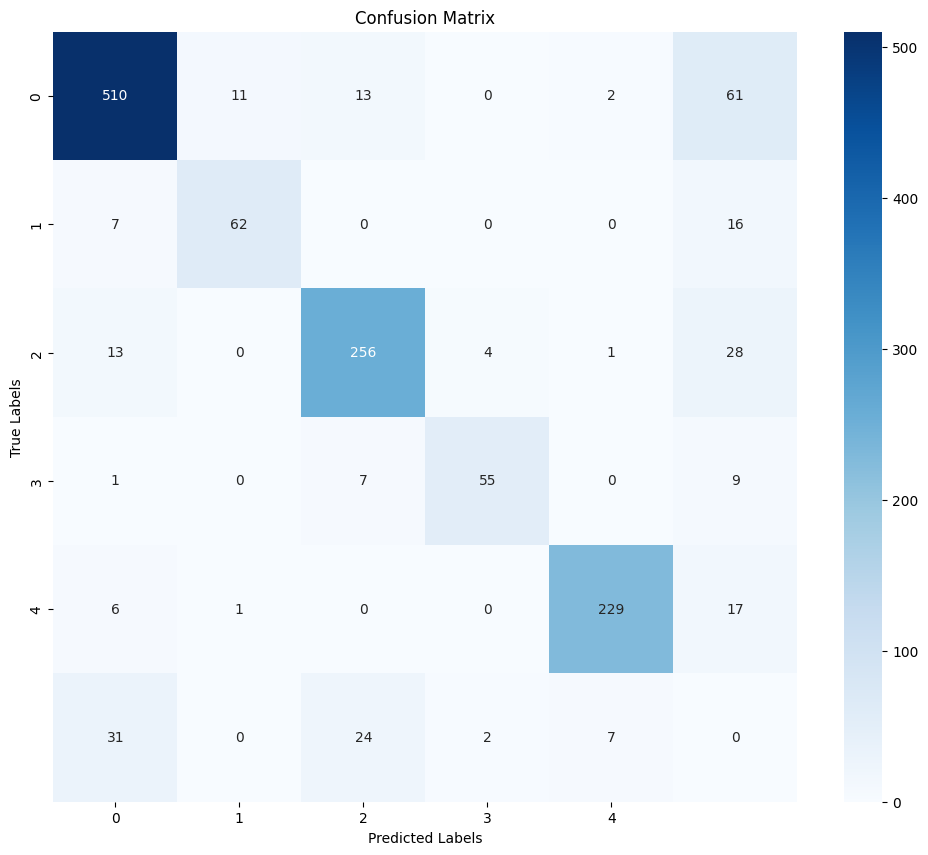

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract confusion matrix
confusion_matrix = metrics.confusion_matrix.matrix
class_names = metrics.names

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   51.8049         1.41342         2.45278         1.82896   
1      2   92.1247         1.50491         2.03194         1.90848   
2      3  131.4790         1.50960         2.03923         1.91036   
3      4  169.7210         1.47383         1.93377         1.87095   
4      5  208.1060         1.42174         1.84986         1.82372   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.55877            0.48533           0.51760   
1               0.56393            0.40691           0.44215   
2               0.50403            0.49090           0.48376   
3               0.57125            0.57896           0.52938   
4               0.65956            0.57030           0.56627   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.22164       1.99428       2.16031       3.07100  0.000369   
1              0.22183       1.81029  

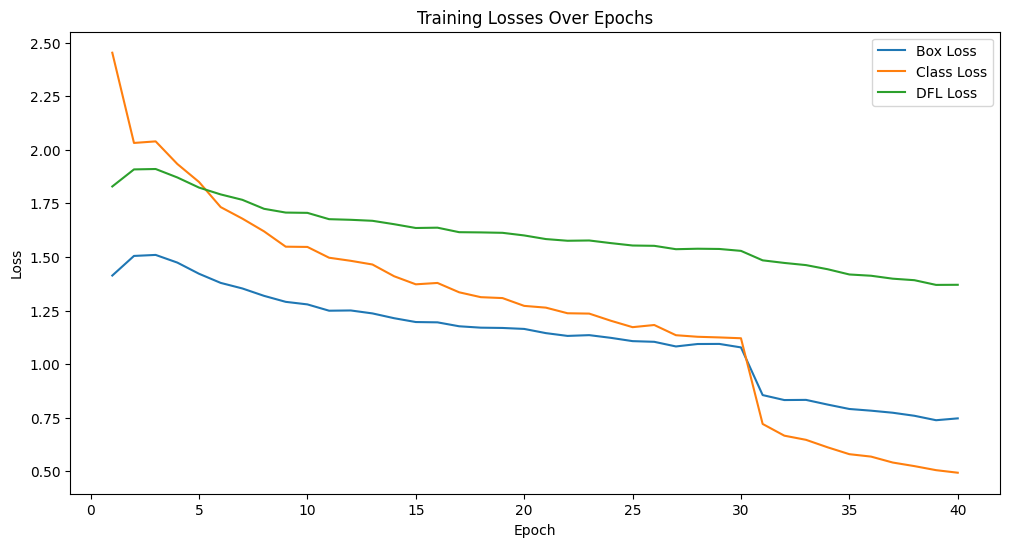

In [12]:
#Detailed Training Metrics

import pandas as pd
results_path = 'runs/detect/train/results.csv'
df_results = pd.read_csv(results_path)

print(df_results.head())

plt.figure(figsize=(12, 6))
plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Box Loss')
plt.plot(df_results['epoch'], df_results['train/cls_loss'], label='Class Loss')
plt.plot(df_results['epoch'], df_results['train/dfl_loss'], label='DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Losses Over Epochs')
plt.legend()
plt.show()
#Accurately fetches and visualizes logged training metrics.

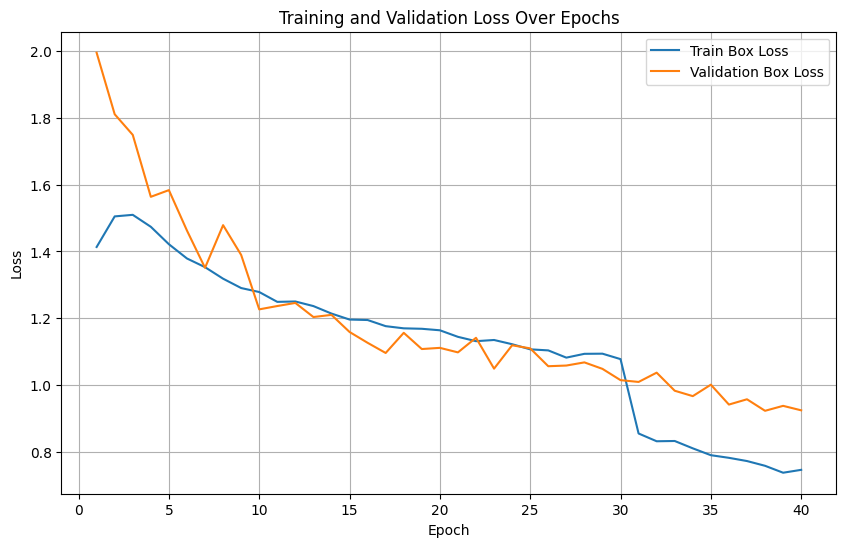

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df_results['epoch'], df_results['train/box_loss'], label='Train Box Loss')
plt.plot(df_results['epoch'], df_results['val/box_loss'], label='Validation Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

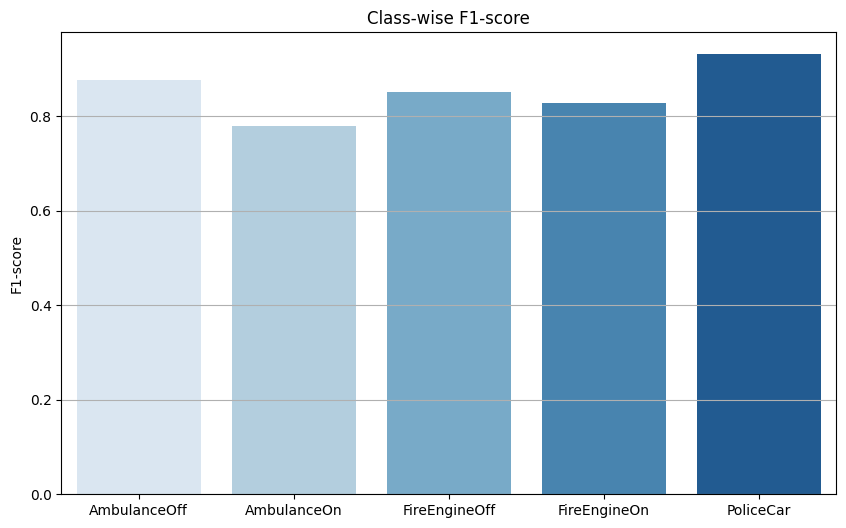

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Confusion matrix from YOLO metrics
cm = metrics.confusion_matrix.matrix

# Manually define your class names (must match your confusion matrix exactly!)
class_names = ['AmbulanceOff', 'AmbulanceOn', 'FireEngineOff', 'FireEngineOn', 'PoliceCar']

# Expand confusion matrix correctly into y_true and y_pred
y_true = []
y_pred = []

for true_label, row in enumerate(cm):
    for pred_label, count in enumerate(row):
        y_true.extend([true_label] * int(count))
        y_pred.extend([pred_label] * int(count))

# Ensure labels match exactly
labels = list(range(len(class_names)))

# Generate the classification report
report = classification_report(y_true, y_pred, labels=labels, target_names=class_names, output_dict=True)

# Extract F1-scores from report
f1_scores = [report[cls]['f1-score'] for cls in class_names]

# Plot F1-scores
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=f1_scores, palette="Blues")
plt.ylabel('F1-score')
plt.title('Class-wise F1-score')
plt.grid(axis='y')
plt.show()


In [22]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')

img_path = '/content/emergency_dataset-4/train/images'

model.predict(source=img_path, save=True)

results = model(img_path)

Streaming output truncated to the last 5000 lines.
image 1988/3486 /content/emergency_dataset-4/train/images/PXQF7MONUBYM_jpg.rf.4de7cd24f11f559b5b232aaf2666a777.jpg: 640x640 3 PoliceCars, 16.0ms
image 1989/3486 /content/emergency_dataset-4/train/images/PXQF7MONUBYM_jpg.rf.61fad1183e40d06503f6a04a8f9e1435.jpg: 640x640 3 PoliceCars, 16.3ms
image 1990/3486 /content/emergency_dataset-4/train/images/PYVL1G0U7OOL_jpg.rf.820094567cc7158c73a2de5d290b47c0.jpg: 640x640 1 AmbulanceOff, 16.1ms
image 1991/3486 /content/emergency_dataset-4/train/images/PYVL1G0U7OOL_jpg.rf.a3eace24d55681cdcf41c158a3841135.jpg: 640x640 1 AmbulanceOff, 15.9ms
image 1992/3486 /content/emergency_dataset-4/train/images/PZG4QKP0MHGL_jpg.rf.96f3d19e5c215836be055150dd85f6b2.jpg: 640x640 3 AmbulanceOffs, 16.0ms
image 1993/3486 /content/emergency_dataset-4/train/images/PZG4QKP0MHGL_jpg.rf.c245bc155ccd7a5d6444b2f0fe9489c2.jpg: 640x640 3 AmbulanceOffs, 15.8ms
image 1994/3486 /content/emergency_dataset-4/train/images/PZYKE4UOBED

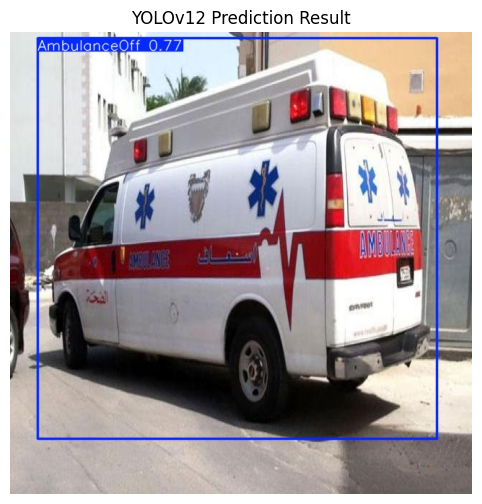

In [25]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import glob

# Define the predicted images folder
predicted_images_path = "/content/runs/detect/predict/"

# Get predicted image from the folder
predicted_images = glob.glob(predicted_images_path + "*.jpg")

if predicted_images:
    image_path = predicted_images[15]

    try:
        img = PILImage.open(image_path)

        # Display the image
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')  # Hide the axes
        plt.title("YOLOv12 Prediction Result")
        plt.show()

    except Exception as e:
        print(f"Error opening {image_path}: {e}")
else:
    print("No predicted images found in the folder.")

In [26]:
#Final Summary
print("Summary of YOLOv12 Experiment 1")
print("Model Used: YOLOv12s (Small)")
print(f"Final mAP@0.5: {metrics.box.map50:.4f}")
print(f"Final mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precision     : {metrics.box.p[0]:.4f}")
print(f"Recall        : {metrics.box.r[0]:.4f}")

Summary of YOLOv12 Experiment 1
Model Used: YOLOv12s (Small)
Final mAP@0.5: 0.9378
Final mAP@0.5:0.95: 0.7190
Precision     : 0.9370
Recall        : 0.8639
